In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics import tsaplots
from matplotlib import pyplot as plt

In [171]:
calendar = pd.read_csv("../data/calendar_afcs2023.csv", parse_dates=["date"])

### Info About Calendar DataFrame

In [172]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1
4,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,0


In [173]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   event_name_1  162 non-null    object        
 7   event_type_1  162 non-null    object        
 8   event_name_2  5 non-null      object        
 9   event_type_2  5 non-null      object        
 10  snap_TX       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 169.3+ KB


### There are 4 columns which are missing information:
1. event_name_1
2. event_name_2
3. event_type_1
4. event_type_2

In [174]:
missing = calendar.isnull().sum().reset_index()
missing = missing[missing[0] > 0]
missing

,index,0
6,event_name_1,1807
7,event_type_1,1807
8,event_name_2,1964
9,event_type_2,1964


### There are no repeating dates

In [175]:
calendar.date.unique().size

1969

### The SnapTX feature is imbalanced towards the negative class
There is incomplete data for the beginning and end years:
2011 - missing before 2011-01-29
2016 - missing after 2016-06-19

In [176]:
calendar.describe()

,date,wm_yr_wk,wday,month,year,snap_TX
count,1969,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,2013-10-09 00:00:00,11347.086338,3.997461,6.325546,2013.288471,0.330117
min,2011-01-29 00:00:00,11101.000000,1.000000,1.000000,2011.000000,0.000000
25%,2012-06-04 00:00:00,11219.000000,2.000000,3.000000,2012.000000,0.000000
50%,2013-10-09 00:00:00,11337.000000,4.000000,6.000000,2013.000000,0.000000
75%,2015-02-13 00:00:00,11502.000000,6.000000,9.000000,2015.000000,1.000000
max,2016-06-19 00:00:00,11621.000000,7.000000,12.000000,2016.000000,1.000000
std,NaN,155.277043,2.001141,3.416864,1.580198,0.470374


In [177]:
calendar.event_name_1.unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [178]:
calendar.event_name_2.unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [179]:
calendar.event_type_1.unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [180]:
calendar.event_type_2.unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

### There are a few observations that have both event 1 and event 2 occurring

There are no instances that there is event 2 but no event one. Event 2 is used to flatten the table so we dont have multiple rows for these events.

In [181]:
calendar[(calendar["event_name_1"].notna()) & (calendar["event_name_2"].notna())]

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
85,2011-04-24,11113,Sunday,2,4,2011,OrthodoxEaster,Religious,Easter,Cultural,0
827,2013-05-05,11315,Sunday,2,5,2013,OrthodoxEaster,Religious,Cinco De Mayo,Cultural,1
1177,2014-04-20,11412,Sunday,2,4,2014,Easter,Cultural,OrthodoxEaster,Religious,0
1233,2014-06-15,11420,Sunday,2,6,2014,NBAFinalsEnd,Sporting,Father's day,Cultural,1
1968,2016-06-19,11621,Sunday,2,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0


In [182]:
calendar[(calendar["event_name_1"].isna()) & (calendar["event_name_2"].notna())]

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX


### Event Name and Event Type always go together

In [183]:
calendar[calendar[['event_name_1', 'event_type_1']].isnull().sum(axis=1) == 1]

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX


In [184]:
calendar[calendar[['event_name_2', 'event_type_2']].isnull().sum(axis=1) == 1]

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX


### Most events occur at most 6 times, but there are some that occur less [4 or 5]

In [185]:
calendar["event_name_1"].value_counts()

event_name_1
SuperBowl              6
Pesach End             6
Ramadan starts         6
ValentinesDay          6
NBAFinalsEnd           6
NBAFinalsStart         6
MemorialDay            6
Mother's day           6
Purim End              6
StPatricksDay          6
LentWeek2              6
LentStart              6
PresidentsDay          6
MartinLutherKingDay    5
OrthodoxChristmas      5
EidAlAdha              5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
IndependenceDay        5
Halloween              5
ColumbusDay            5
LaborDay               5
Eid al-Fitr            5
Cinco De Mayo          5
OrthodoxEaster         5
Easter                 5
Father's day           4
Name: count, dtype: int64

### There appears to be a tick up in the average snap_TX from 2015 to 2016
This can, however, be misleading since we only have partial data for 2016, and we can see that the average value bumps up in the first half of the year.

<Axes: xlabel='wm_yr_wk', ylabel='snap_TX'>

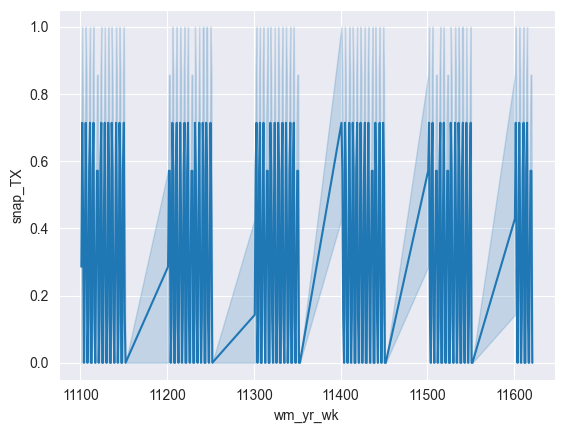

In [186]:
sns.lineplot(data=calendar, y="snap_TX", x="wm_yr_wk")

<Axes: xlabel='year', ylabel='snap_TX'>

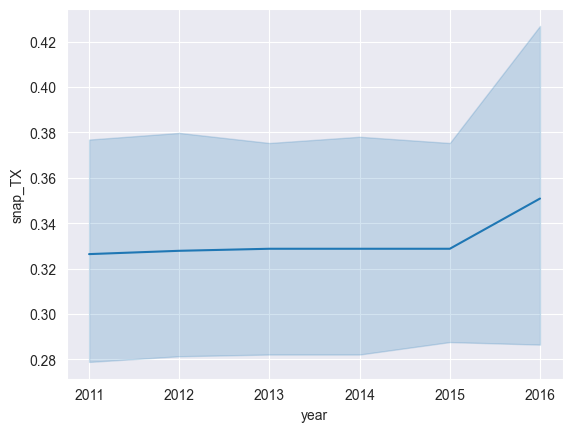

In [187]:
sns.lineplot(data=calendar, y="snap_TX", x="year")

<Axes: xlabel='month', ylabel='snap_TX'>

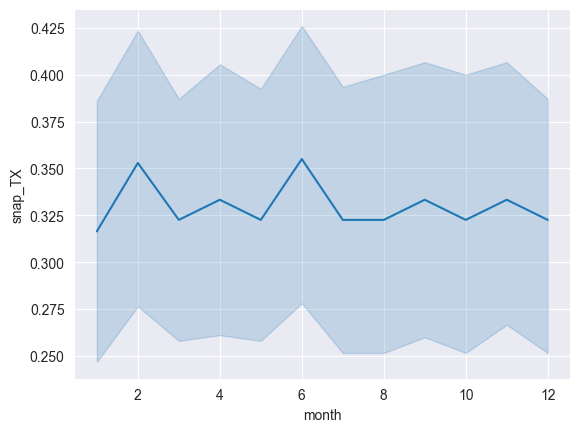

In [188]:
sns.lineplot(data=calendar, y="snap_TX", x='month')

<Axes: xlabel='month', ylabel='snap_TX'>

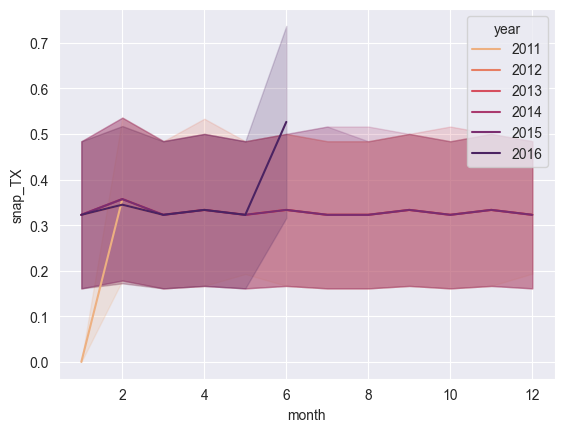

In [189]:
sns.lineplot(data=calendar, y="snap_TX", x='month', hue='year', palette="flare")

### Looking at the auto-correlation of the data, there appears to be seasonality

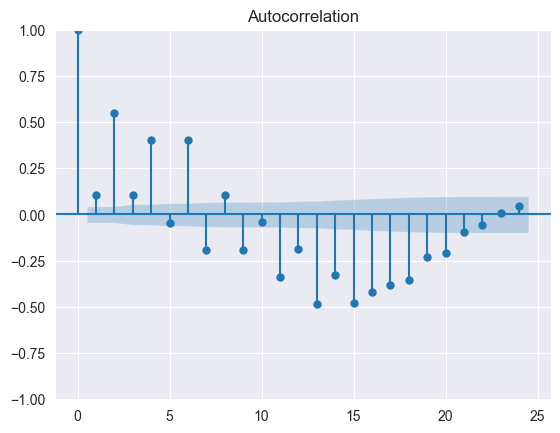

In [190]:
fig = tsaplots.plot_acf(calendar['snap_TX'], lags=24)
plt.show()

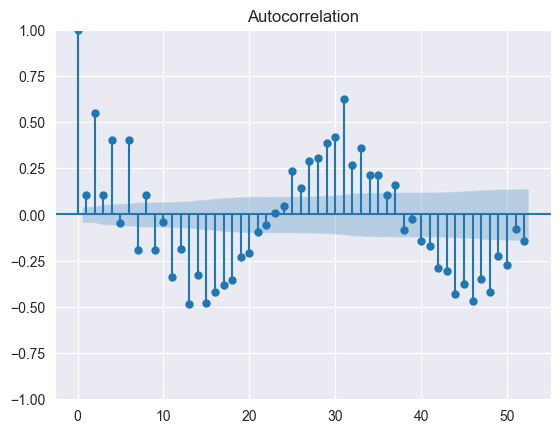

In [191]:
fig = tsaplots.plot_acf(calendar['snap_TX'], lags=52)
plt.show()

### Since the prices dataset is weekly, we need to handle the way the snap_Tx and the events are handled.

In [192]:
calendar = calendar.set_index("date")

In [193]:
calendar["count_events"] = calendar[["event_name_1", "event_name_2"]].notna().sum(1)

In [194]:
calendar['count_events_not_weekend'] = calendar.apply(lambda x: x['count_events'] if x['weekday'] not in ['Saturday', "Sunday"] else 0, axis=1)

In [195]:
calendar['count_events_not_weekday'] = calendar.apply(lambda x: x['count_events'] if x['weekday'] in ['Saturday', "Sunday"] else 0, axis=1)

In [197]:
calendar = calendar.resample("W").agg(
    {   "wm_yr_wk": "max",
        "count_events": "sum",
        "count_events_not_weekend": "sum",
        "count_events_not_weekday":"sum",
        "snap_TX": ["mean", "sum"]
    }
)

In [198]:
calendar = calendar.reset_index().droplevel(1, axis=1)

In [199]:
calendar.columns = ['date', "wm_yr_wk", 'count_events', 'count_events_not_weekend',
       'count_events_not_weekday', 'snap_TX_mean', 'snap_TX_sum']

In [200]:
calendar

,date,wm_yr_wk,count_events,count_events_not_weekend,count_events_not_weekday,snap_TX_mean,snap_TX_sum
0,2011-01-30,11101,0,0,0,0.000000,0
1,2011-02-06,11102,1,0,1,0.571429,4
2,2011-02-13,11103,0,0,0,0.714286,5
3,2011-02-20,11104,1,1,0,0.142857,1
4,2011-02-27,11105,1,1,0,0.000000,0
...,...,...,...,...,...,...,...
277,2016-05-22,11617,0,0,0,0.000000,0
278,2016-05-29,11618,0,0,0,0.000000,0
279,2016-06-05,11619,2,2,0,0.428571,3
280,2016-06-12,11620,1,1,0,0.714286,5


In [201]:
calendar.to_pickle("../data/transformed_calendar.pkl")